In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_openml
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.simplefilter('ignore')

C:\Users\master16\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\master16\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\master16\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\master16\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarnin

In [2]:
data_generator = ImageDataGenerator(rescale=1./255) # 스케일링
# 디렉토리로 들고와서 한 번에 배열로 바꿈
traingen = data_generator.flow_from_directory("../myimg", target_size=(98, 98), class_mode='sparse', seed=1) # 라벨로 분류

Found 32 images belonging to 2 classes.


In [3]:
x_train, y_train = traingen.next()

In [4]:
x_train.shape # 이미지 개수, 이미지 크기(픽셀 값 98*98), 칼라뎁스(rgb) # 흑백 1, 투명까지 하면 4

# 4차원

(32, 98, 98, 3)

In [5]:
y_train.shape

(32,)

In [6]:
# 고양이는 0, 강아지는 1

y_train

array([1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
      dtype=float32)

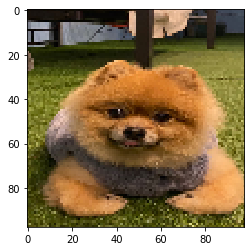

In [7]:
plt.imshow(x_train[26])

In [8]:
x_reshape = x_train.reshape(32, -1) # 98*98*3 = 28813
x_reshape.shape

# 행의 개수 32 = 이미지의 개수 32

(32, 28812)

In [9]:
model = MLPClassifier(verbose=1)
model.fit(x_reshape, y_train) # matmul을 하기 위해 x_reshape

Iteration 1, loss = 0.84443502
Iteration 2, loss = 7.97150850
Iteration 3, loss = 7.84918575
Iteration 4, loss = 6.42065075
Iteration 5, loss = 7.12956300
Iteration 6, loss = 6.85469360
Iteration 7, loss = 5.97993977
Iteration 8, loss = 4.25327569
Iteration 9, loss = 2.06693909
Iteration 10, loss = 0.64580317
Iteration 11, loss = 2.24101745
Iteration 12, loss = 3.20189463
Iteration 13, loss = 3.43324295
Iteration 14, loss = 3.08630151
Iteration 15, loss = 2.26093426
Iteration 16, loss = 1.13231912
Iteration 17, loss = 0.57068679
Iteration 18, loss = 1.29675343
Iteration 19, loss = 1.85028222
Iteration 20, loss = 1.95576426
Iteration 21, loss = 1.65830081
Iteration 22, loss = 1.75514222
Iteration 23, loss = 0.51655992
Iteration 24, loss = 0.74758370
Iteration 25, loss = 1.20867909
Iteration 26, loss = 1.35207496
Iteration 27, loss = 1.14174024
Iteration 28, loss = 0.71474045
Iteration 29, loss = 0.45731050
Iteration 30, loss = 0.64842532
Iteration 31, loss = 0.89194207
Iteration 32, los

MLPClassifier(verbose=1)

In [10]:
model.score(x_reshape, y_train)

1.0

In [11]:
model.predict([x_reshape[0]]) # 기존에 있는 이미지를 주었는데 맞췄음!!

array([1.], dtype=float32)

# 덕근이 불러오기 멍멍!

In [12]:
# 사진 한 개씩 불러오려면 이렇게!
from tensorflow.keras.preprocessing import image

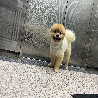

In [13]:
imgData = image.load_img('../image/test.jpg', target_size=(98, 98))
imgData

In [14]:
# 배열로 바꾸기
testImg = image.img_to_array(imgData)/255
testImg

array([[[0.3019608 , 0.30980393, 0.2901961 ],
        [0.30980393, 0.31764707, 0.29803923],
        [0.29803923, 0.30588236, 0.28627452],
        ...,
        [0.6313726 , 0.63529414, 0.6117647 ],
        [0.6117647 , 0.60784316, 0.5882353 ],
        [0.6313726 , 0.627451  , 0.60784316]],

       [[0.30588236, 0.3137255 , 0.30980393],
        [0.3137255 , 0.32156864, 0.31764707],
        [0.3254902 , 0.33333334, 0.32156864],
        ...,
        [0.6313726 , 0.627451  , 0.60784316],
        [0.62352943, 0.61960787, 0.6       ],
        [0.64705884, 0.6431373 , 0.62352943]],

       [[0.29803923, 0.30588236, 0.29411766],
        [0.25490198, 0.2627451 , 0.2509804 ],
        [0.29803923, 0.30588236, 0.29411766],
        ...,
        [0.6392157 , 0.63529414, 0.6156863 ],
        [0.62352943, 0.61960787, 0.6       ],
        [0.59607846, 0.5921569 , 0.57254905]],

       ...,

       [[0.9882353 , 0.9529412 , 0.9254902 ],
        [0.76862746, 0.7372549 , 0.7254902 ],
        [0.8745098 , 0

In [15]:
testImg.shape

(98, 98, 3)

In [16]:
model.predict(testImg.reshape(1, -1))

array([1.], dtype=float32)

# 모델 저장

In [17]:
!pip install joblib

In [18]:
import joblib

In [19]:
joblib.dump(model, 'catdog.pkl') # 피클

['catdog.pkl']

# 모델 읽기

In [20]:
mymodel = joblib.load('catdog.pkl')
mymodel.predict(testImg.reshape(1, -1))

array([1.], dtype=float32)